#### Author -  Aishwarya

#### Author -  Manjushree

### Data Exploration 

Data exploration refers to the initial step in data analysis in which data analysts use data visualization and statistical techniques to describe dataset characterizations, such as size, quantity, and accuracy, in order to better understand the nature of the data.




Python statements that import the standard libraries


In [1]:

import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as matplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Read the csv file in a dataframe

In [2]:
df = pd.read_csv("../data/Customer_churn_raw.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38.0,0,4370,71.0,5.0,17.0,1,1,5,197.640,177.8760,69.7640,0
1,O,0,39.0,0,NaN,5.0,7.0,4.0,1,1,6,46.035,41.4315,60.0000,0
2,10,0,37.0,0,2453,60.0,359.0,24.0,1,1,2,1536.520,1382.8680,203.6520,0
3,10,0,38.0,0,4198,66.0,1.0,35.0,1,1,10,240.020,216.0180,74.0020,0
4,3,0,NaN,0,2393,58.0,2.0,33.0,1,1,9,145.805,131.2245,64.5805,0


Checking number of rows and columns

In [3]:
df.duplicated().any()

True

In [4]:
df.shape

(3150, 15)

Checking the datatypes of each columns

In [5]:
df.dtypes

Call  Failure               object
Complains                   object
Subscription  Length       float64
Charge  Amount              object
Seconds of Use              object
Frequency of use           float64
Frequency of SMS           float64
Distinct Called Numbers    float64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
FN                         float64
FP                         float64
Churn                        int64
dtype: object

Renaming the column names

In [6]:
df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "seconds_of_use", "Frequency of use": "freq_of_use", "Frequency of SMS": "freq_of_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})

Missingno is a Python library that provides the ability to understand the distribution of missing values through informative visualizations. The visualizations can be in the form of heat maps or bar charts

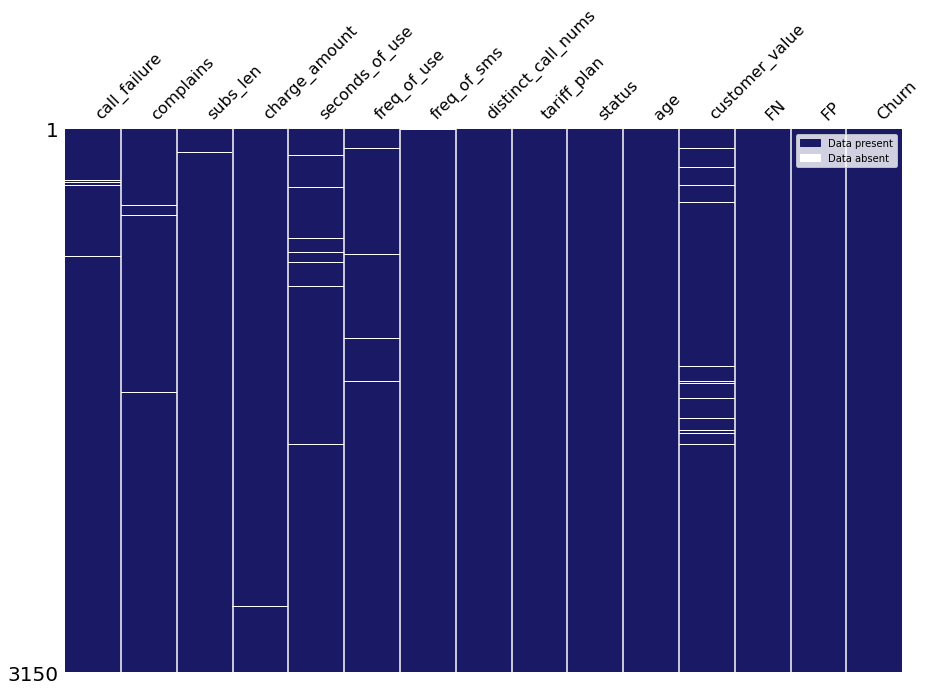

In [7]:
msno.matrix(df,figsize=(15,10), sparkline=False, p=0, color=(0.1, 0.1, 0.4))
gray_patch = mpatches.Patch(color=(0.1, 0.1, 0.4), label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch])
plt.savefig('./images/missing_values.png')
plt.show()

Missing values are showing in many columns with white stripe lines

#### Observation
From the above plot, Columns call_failure, complains, subs_len, charge_amount, seconds_of_use, frequency_of_use and customer_value columns have missing values which need to be cleaned

checking for null values

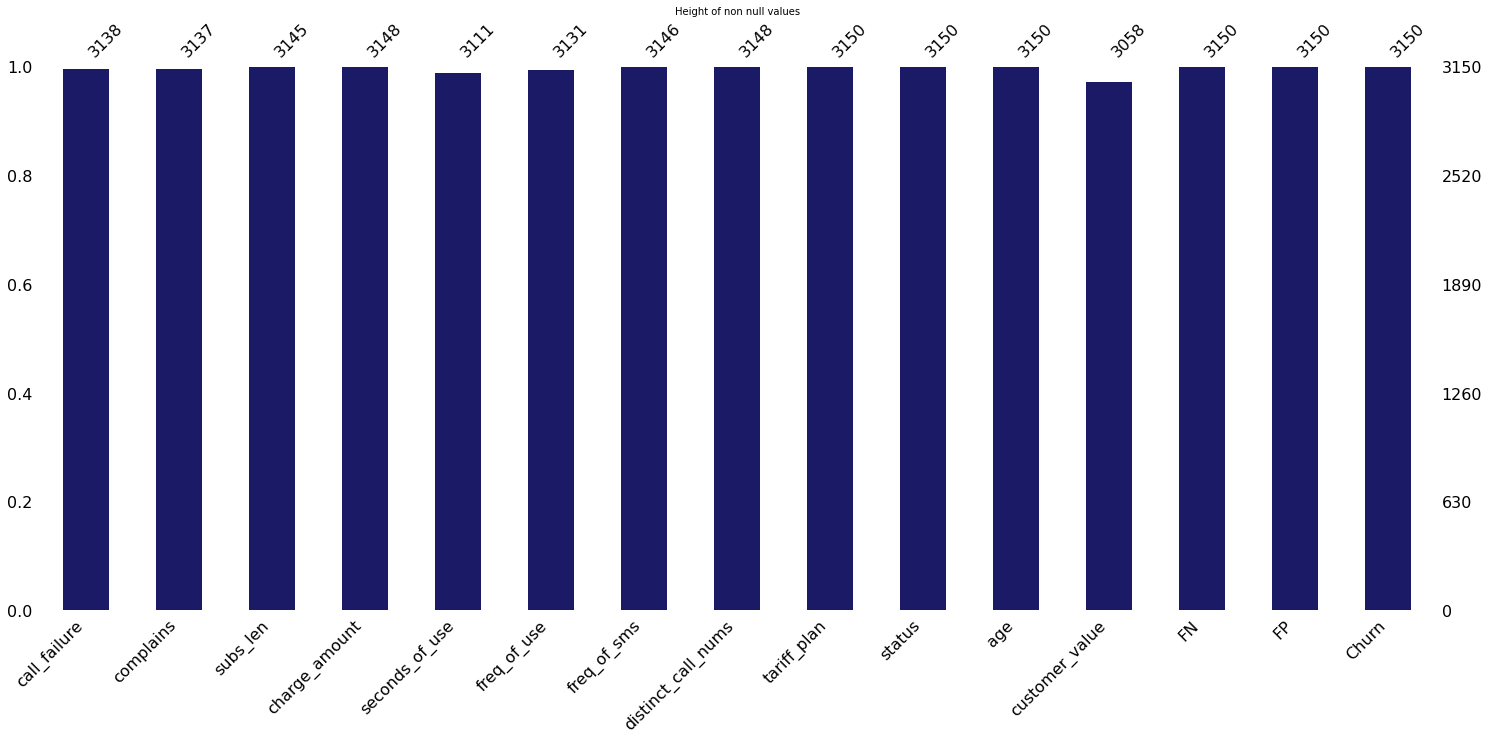

In [8]:
msno.bar(df,color=(0.1, 0.1, 0.4))
plt.title('Height of non null values', fontsize = 10)
plt.savefig('./images/null_values.png')
plt.show()


##### Observations

From the above plot, Customer_value column has the most number of null values as the height if that bar is small comapred to the remaining bar plots

Frequency distribution of all the columns

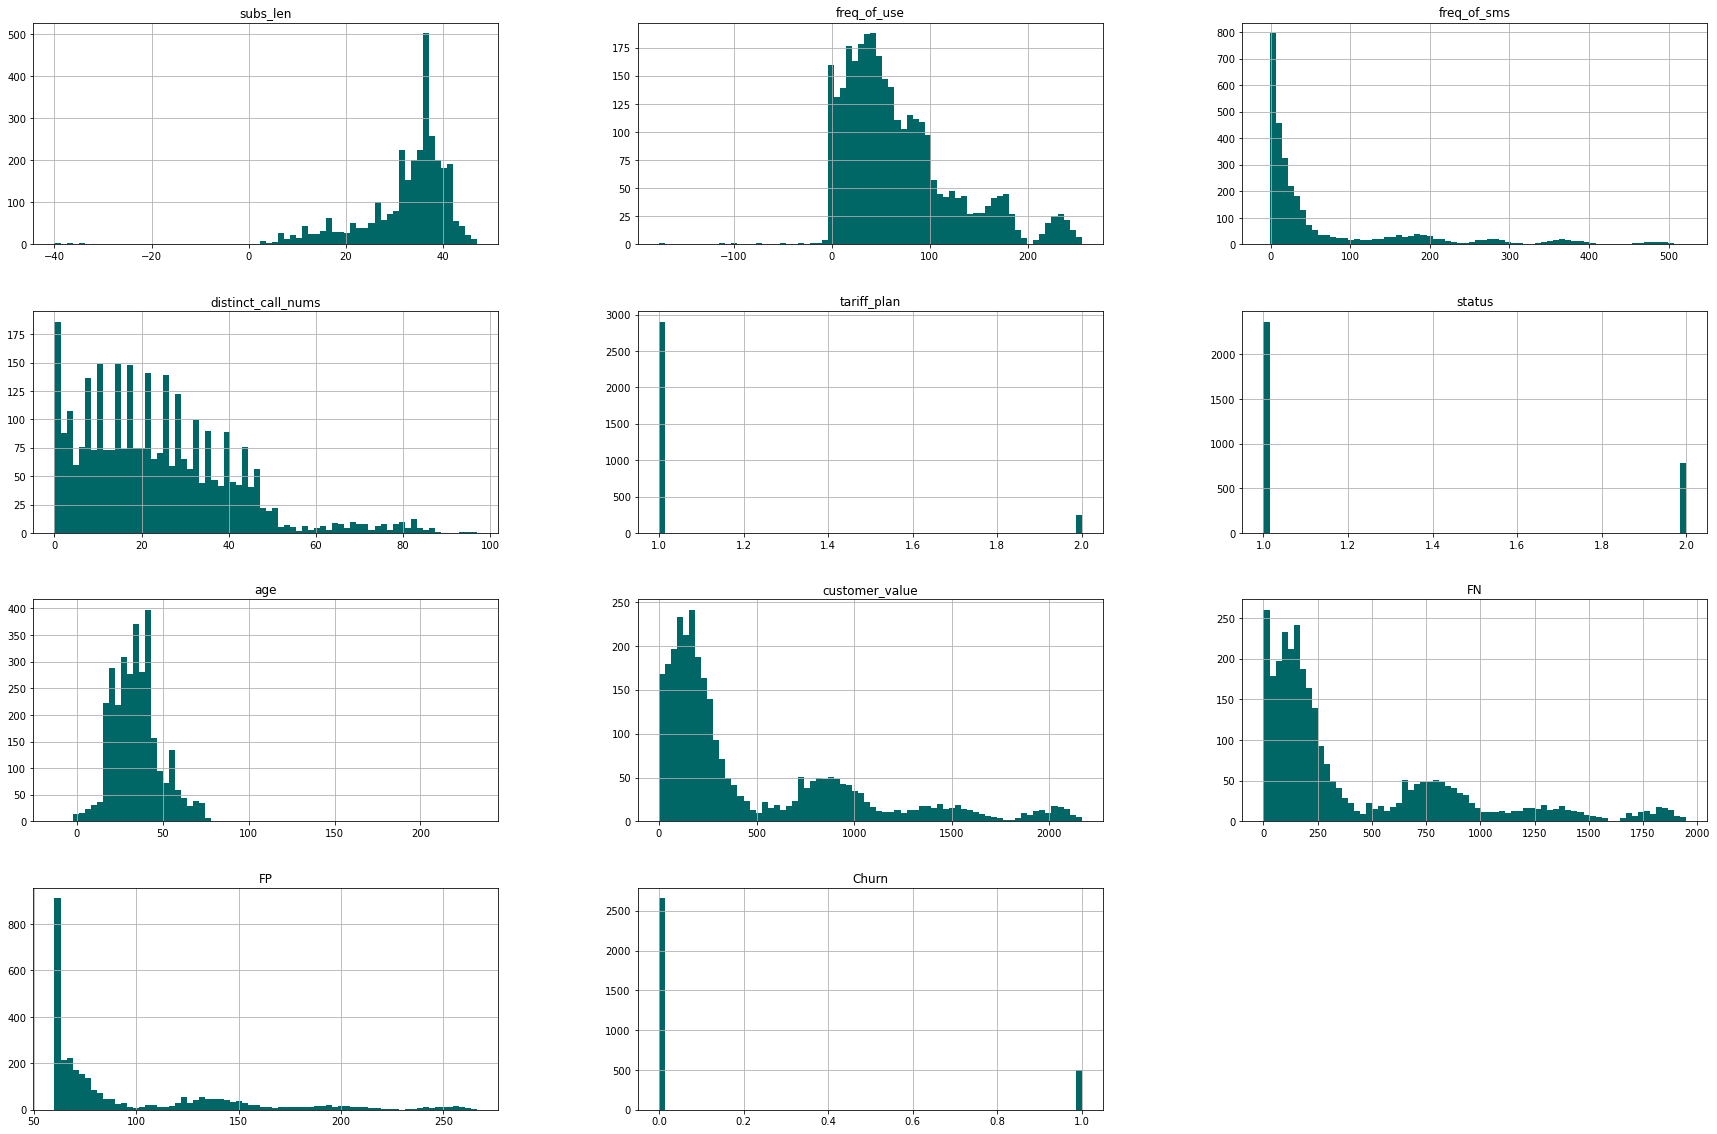

In [9]:

# Frequency distribution of all the columns

df.hist(bins=70,figsize=(30,20),color=(0,0.4,0.4))
plt.savefig('./images/frequency_distribution.png')
plt.show()

#### Observation: 
 Frequency distribution of all the columns are shown above

Value counts of all the columns

<Figure size 2304x2304 with 0 Axes>

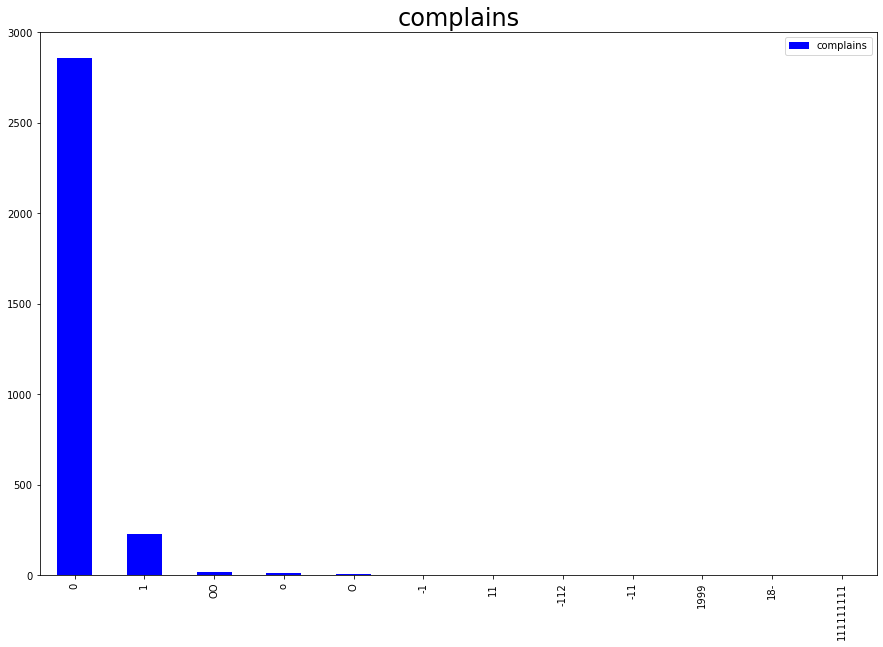

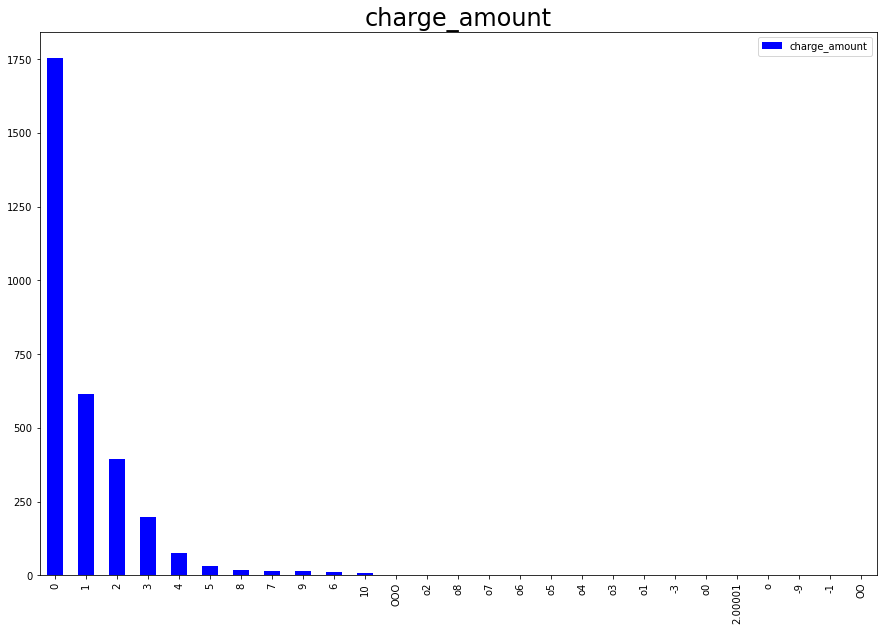

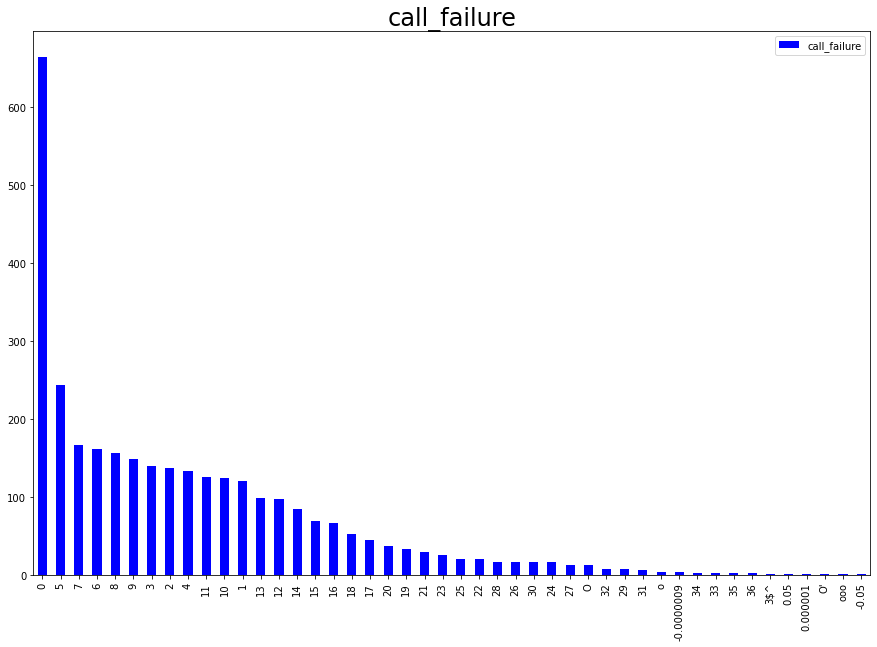

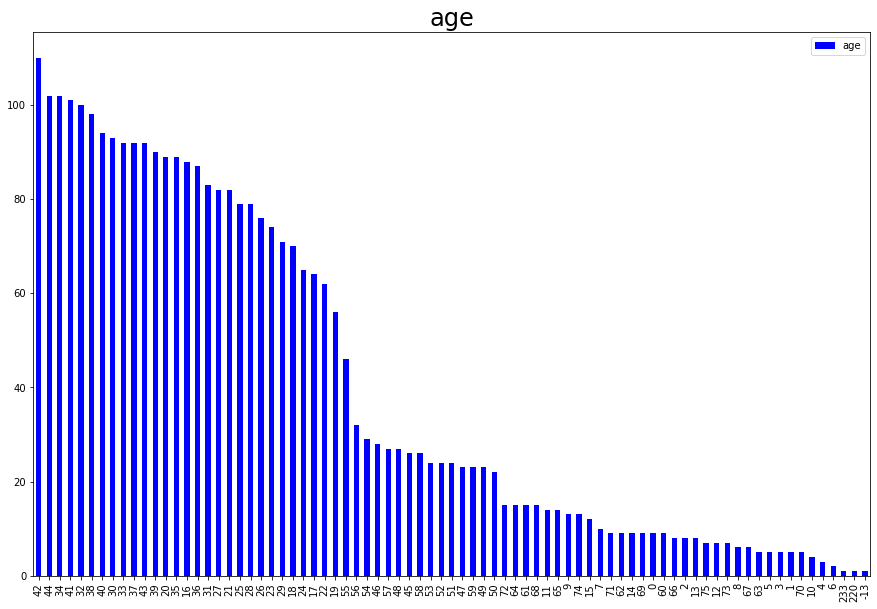

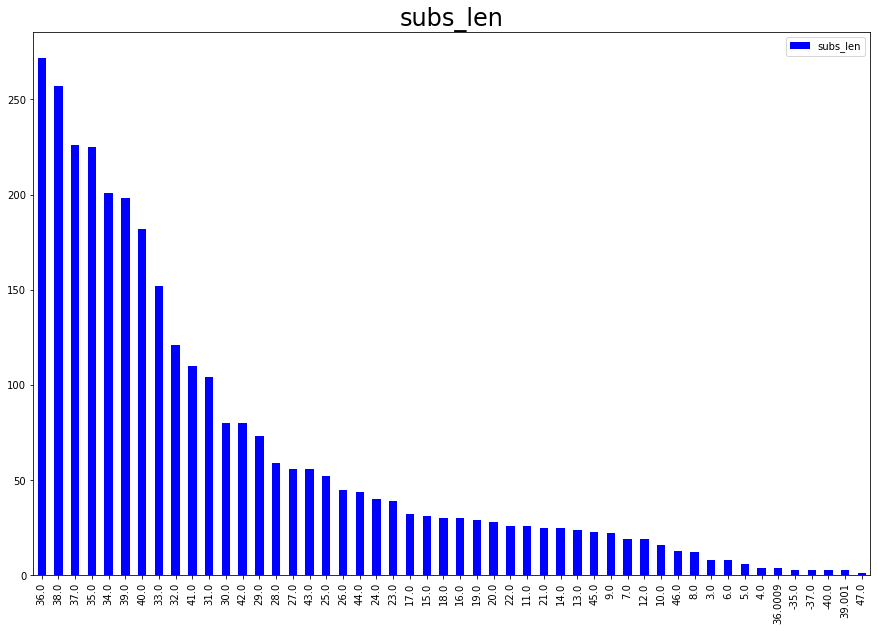

In [10]:
import matplotlib

plt.figure(figsize=(32, 32))
matplotlib.rc('axes', titlesize=24)#cols size

columns=["complains", "charge_amount", "call_failure", "age",'subs_len']
for i, column in enumerate(columns, 1):
    pd.DataFrame(df[column].value_counts()).plot(kind='bar',figsize=(15,10),color="blue")
    plt.legend(fontsize='medium')
    plt.title(column)

#### Observation 1:
Age column has some negative and string values which need to be changed

#### Observation 2:
Charge amount has some string values which need to be changed


#### Observation 3:
Charge amount has some string values which need to be changed

#### Observation 4:
Call failure has some negatve values and outliers which need to be cleaned


#### Observation 5:
Subscription length has some negative values which needs to cleaned

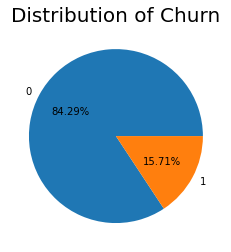

<Figure size 720x720 with 0 Axes>

In [11]:
# Churn distribution 

plt.pie(df.Churn.value_counts(), labels=df.Churn.unique(), autopct='%1.2f%%')
plt.title('Distribution of Churn', fontsize = 20)
plt.figure(figsize=(10,10))
plt.savefig('./images/churn_distribution.png')
plt.show()

#### Observations
 
There are 84.29% Non churn value and 15.71% churn values are there

## Box Plot

Boxplot is a chart that is used to visualize how a given data (variable) is distributed using quartiles. It shows the minimum, maximum, median, first quartile and third quartile in the data set.

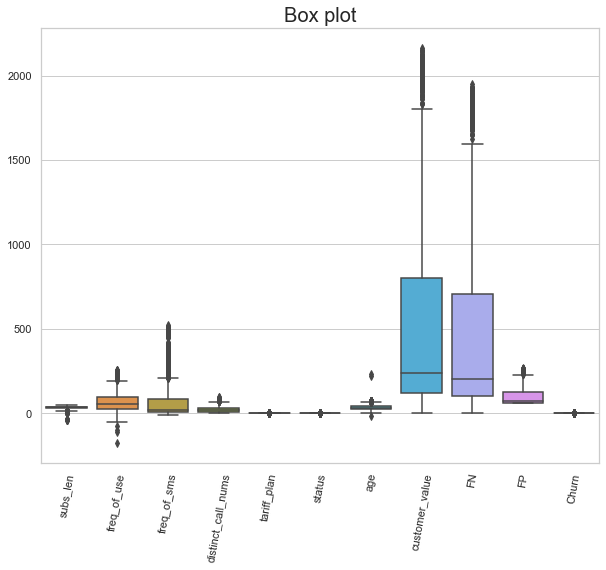

In [12]:
sn.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(10,8))
sn.boxplot(data=df)
plt.xticks(rotation=80)
plt.title("Box plot",fontsize = 20)
plt.savefig('./images/boxplot_beforeDataCleaning.png')
plt.show()

 #### Observation1: 
 As we can see there are outliers in our dataset, especially in cutsomer_value and FN column we have more outliers


### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. Create your own correlation matrix.

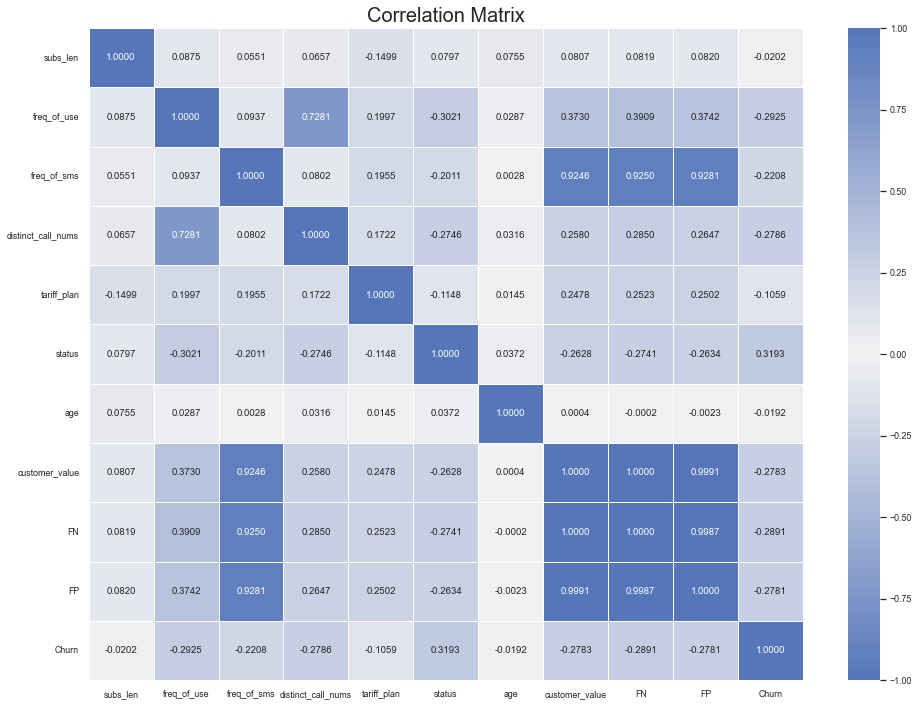

In [13]:
df_corr = df.corr()

# correlation matrix

sn.set(font_scale=0.8)
plt.figure(figsize=(16,12))
plt.title("Correlation Matrix",fontsize = 20)
sn.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sn.diverging_palette(255, 255, s=60, as_cmap=True))
plt.savefig('./images/heat_map_correlationMatrix.png')
plt.show()

##### Observations 1:


We observe a positive correlation between freq_of_sms and customer_value, FN and FP. 

##### Observations 2:
We observe a  positive correlation between freq_of_use and distinct_call_nums. The correlation coefficient value is 0.7281

